<a href="https://colab.research.google.com/github/Rogerio-mack/Analise_Exploratoria_de_Dados/blob/main/AED_5_Prof_Resolve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# Aula 5 Professor Resolve
---
No nosso ponto de partida você acompanhou como interpretar os gráficos de distribuição. Nesta vídeo-aula vou ensinar a você como obter resultados de probabilidades e valores a partir das funções do R o que será muito útil para você.

<h4>Table 1:Funções de Distribuição de Probabilidade em R</h4>
<table>
<thead>
<tr class="header">
<th align="left">Name</th>
<th align="left">Probability Density</th>
<th align="left">Cumulative Distribution</th>
<th align="left">Quantile</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td align="left">Normal</td>
<td align="left">dnorm(Z,mean,sd)</td>
<td align="left">pnorm(Z,mean,sd)</td>
<td align="left">qnorm(Q,mean,sd)</td>
</tr>
<tr class="even">
<td align="left">Poisson</td>
<td align="left">dpois(N,lambda)</td>
<td align="left">ppois(N,lambda)</td>
<td align="left">qpois(Q,lambda)</td>
</tr>
<tr class="odd">
<td align="left">Binomial</td>
<td align="left">dbinom(N,size,prob)</td>
<td align="left">pbinom(N,size,prob)</td>
<td align="left">qbinom(Q,size,prob)</td>
</tr>
<tr class="even">
<td align="left">Exponential</td>
<td align="left">dexp(N,rate)</td>
<td align="left">pexp(N,rate)</td>
<td align="left">qexp(Q,rate)</td>
</tr>
<tr class="odd">
<td align="left">X2</td>
<td align="left">dchisq(X,df)</td>
<td align="left">pchisq(X.df)</td>
<td align="left">qchisq(X,df)</td>
</tr>
</tbody>
</table>


* [Relação de principais distribuições de probabilidades em R](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/Distributions.html)

## Distribuição Normal

* [Distribuição Normal](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/Normal.html)

```
dnorm(x, mean = 0, sd = 1, log = FALSE)
pnorm(q, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)
qnorm(p, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)
rnorm(n, mean = 0, sd = 1)
```


Distribuição Normal - Entre com "s" se deseja empregar os valores padrão: s


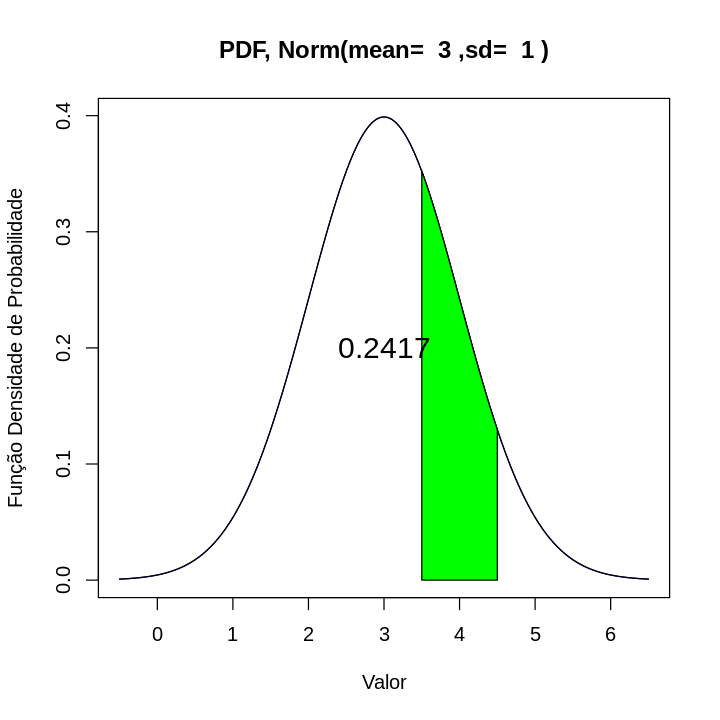

In [9]:
option = readline(prompt='Distribuição Normal - Entre com "s" se deseja empregar os valores padrão: ')

if (option == 's'){
  mu = 3
  sigma = 1
  lb = 3.5
  ub = 4.5
} else {
  mu = as.numeric(readline(prompt='Entre com a média: ')) 
  sigma = as.numeric(readline(prompt='Entre com o desvio padrão: ')) 
  lb = as.numeric(readline(prompt='Limite Inferior: '))
  ub = as.numeric(readline(prompt='Limite Superior: '))
}

prob = c(0)

x = seq(mu - 3.5*sigma,mu + 3.5*sigma,0.05)

par(mfrow = c(1, 1))
options(repr.plot.width=6, repr.plot.height=6)

prob = dnorm(x, mean=mu, sd=sigma)

txt = paste('PDF, Norm(mean= ', mu ,',sd= ',sigma,')' )  

plot(x,
     prob,
     type='l',
     xlab = 'Valor',
     ylab = 'Função Densidade de Probabilidade',
     col='darkblue')
title(txt)

# abline(v=2,col='red',lty='dotted',lwd=1.5)

i <- x >= lb & x <= ub
lines(x, prob)                                       # desenha as linhas limite
polygon(c(lb,x[i],ub), c(0,prob[i],0), col="green")  # preenche a área sob a curva

p_intervalo = pnorm(ub,mean=mu,sd=sigma) - pnorm(lb,mean=mu,sd=sigma)
text(( par('xaxp')[1]+par('xaxp')[2] )/2,( par('yaxp')[1]+par('yaxp')[2] )/2, round(p_intervalo,4),cex=1.5)


## Função Densidade `dnorm, d<dist>`

In [10]:
# dnorm(x, mean = 0, sd = 1, log = FALSE)
print( dnorm(3.5,mean=3,sd=1) )
print( dnorm(4.5,mean=3,sd=1) )

[1] 0.3520653
[1] 0.1295176


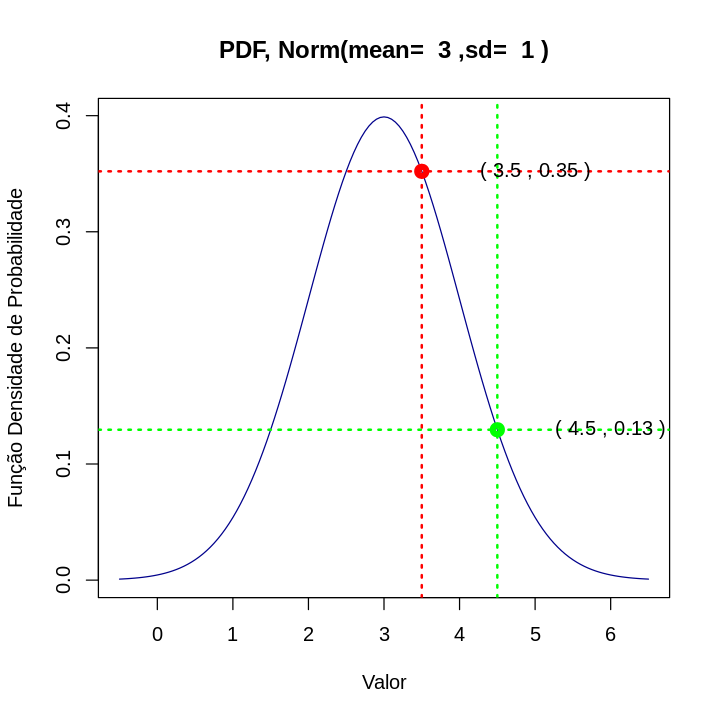

In [30]:
prob = c(0)

x = seq(mu - 3.5*sigma,mu + 3.5*sigma,0.05)

par(mfrow = c(1, 1))
options(repr.plot.width=6, repr.plot.height=6)

prob = dnorm(x, mean=mu, sd=sigma)

txt = paste('PDF, Norm(mean= ', mu ,',sd= ',sigma,')' )  

plot(x,
     prob,
     type='l',
     xlab = 'Valor',
     ylab = 'Função Densidade de Probabilidade',
     col='darkblue')
title(txt)

abline(v=lb,col='red',lty='dotted',lwd=2)
abline(h=dnorm(lb,mean=mu,sd=sigma),col='red',lty='dotted',lwd=2)
points(lb,dnorm(lb,mean=mu,sd=sigma),col='red',lwd=5)

abline(v=ub,col='green',lty='dotted',lwd=2)
abline(h=dnorm(ub,mean=mu,sd=sigma),col='green',lty='dotted',lwd=2)
points(ub,dnorm(ub,mean=mu,sd=sigma),col='green',lwd=5)

txt = paste('(',lb,',',round(dnorm(lb,mean=mu,sd=sigma),2),')')
text(lb+1.5*sigma,dnorm(lb,mean=mu,sd=sigma),txt,cex=1)

txt = paste('(',ub,',',round(dnorm(ub,mean=mu,sd=sigma),2),')')
text(ub+1.5*sigma,dnorm(ub,mean=mu,sd=sigma),txt,cex=1)



## Função Densidade Acumulada `pnorm, p<dist>`

In [76]:
# pnorm(q, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)
print( pnorm(3.5,mean=3,sd=1) )
print( pnorm(4.5,mean=3,sd=1) )

[1] 0.6914625
[1] 0.9331928


In [32]:
print( pnorm(4.5,mean=3,sd=1) - pnorm(3.5,mean=3,sd=1) )

[1] 0.2417303


Distribuição Normal - Entre com "s" se deseja empregar os valores padrão: s


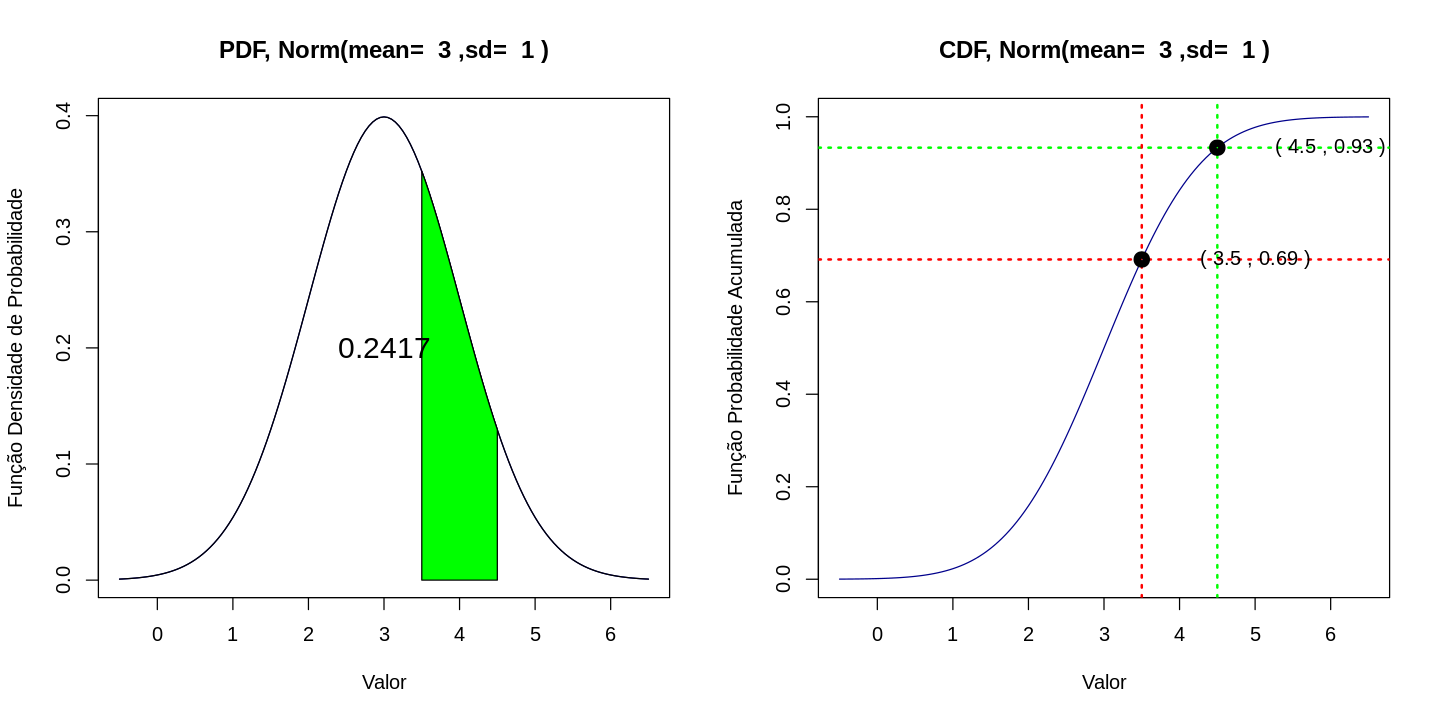

In [35]:
option = readline(prompt='Distribuição Normal - Entre com "s" se deseja empregar os valores padrão: ')

if (option == 's'){
  mu = 3
  sigma = 1
  lb = 3.5
  ub = 4.5
} else {
  mu = as.numeric(readline(prompt='Entre com a média: ')) 
  sigma = as.numeric(readline(prompt='Entre com o desvio padrão: ')) 
  ub = as.numeric(readline(prompt='Limite Superior: '))
}

prob = c(0)

x = seq(mu - 3.5*sigma,mu + 3.5*sigma,0.05)

par(mfrow = c(1, 2))
options(repr.plot.width=12, repr.plot.height=6)

prob = dnorm(x, mean=mu, sd=sigma)

txt = paste('PDF, Norm(mean= ', mu ,',sd= ',sigma,')' )  

plot(x,
     prob,
     type='l',
     xlab = 'Valor',
     ylab = 'Função Densidade de Probabilidade',
     col='darkblue')
title(txt)

i <- x >= lb & x <= ub
lines(x, prob)                                       # desenha as linhas limite
polygon(c(lb,x[i],ub), c(0,prob[i],0), col="green")  # preenche a área sob a curva

p_intervalo = pnorm(ub,mean=mu,sd=sigma) - pnorm(lb,mean=mu,sd=sigma)
text(( par('xaxp')[1]+par('xaxp')[2] )/2,( par('yaxp')[1]+par('yaxp')[2] )/2, round(p_intervalo,4),cex=1.5)

prob = pnorm(x, mean=mu, sd=sigma)

txt = paste('CDF, Norm(mean= ', mu ,',sd= ',sigma,')' )  

plot(x,
     prob,
     type='l',
     xlab = 'Valor',
     ylab = 'Função Probabilidade Acumulada',
     col='darkblue')
title(txt)

abline(v=ub,col='green',lty='dotted',lwd=2)
abline(h=pnorm(ub,mean=mu,sd=sigma),col='green',lty='dotted',lwd=2)
points(ub,pnorm(ub,mean=mu,sd=sigma),col='black',lwd=6)

abline(v=lb,col='red',lty='dotted',lwd=2)
abline(h=pnorm(lb,mean=mu,sd=sigma),col='red',lty='dotted',lwd=2)
points(lb,pnorm(lb,mean=mu,sd=sigma),col='black',lwd=6)

txt = paste('(',lb,',',round(pnorm(lb,mean=mu,sd=sigma),2),')')
text(lb+1.5*sigma,pnorm(lb,mean=mu,sd=sigma),txt,cex=1)

txt = paste('(',ub,',',round(pnorm(ub,mean=mu,sd=sigma),2),')')
text(ub+1.5*sigma,pnorm(ub,mean=mu,sd=sigma),txt,cex=1)


In [37]:
# pnorm(q, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)
print( pnorm(4.5,mean=3,lower.tail = F,sd=1) )

[1] 0.0668072


In [38]:
# pnorm(q, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)
print( 1 - pnorm(4.5,mean=3,lower.tail = F,sd=1) )

[1] 0.9331928


In [39]:
# pnorm(q, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)
print( 1 - pnorm(4.5,mean=3,lower.tail = F,sd=1) == pnorm(4.5,mean=3,sd=1) )

[1] TRUE


## Função Densidade Acumulada Inversa `qnorm, q<dist>`

In [77]:
# qnorm(p, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)
print( qnorm(0.70,mean=3,sd=1) )


[1] 3.524401


Distribuição Normal - Entre com "s" se deseja empregar os valores padrão: s


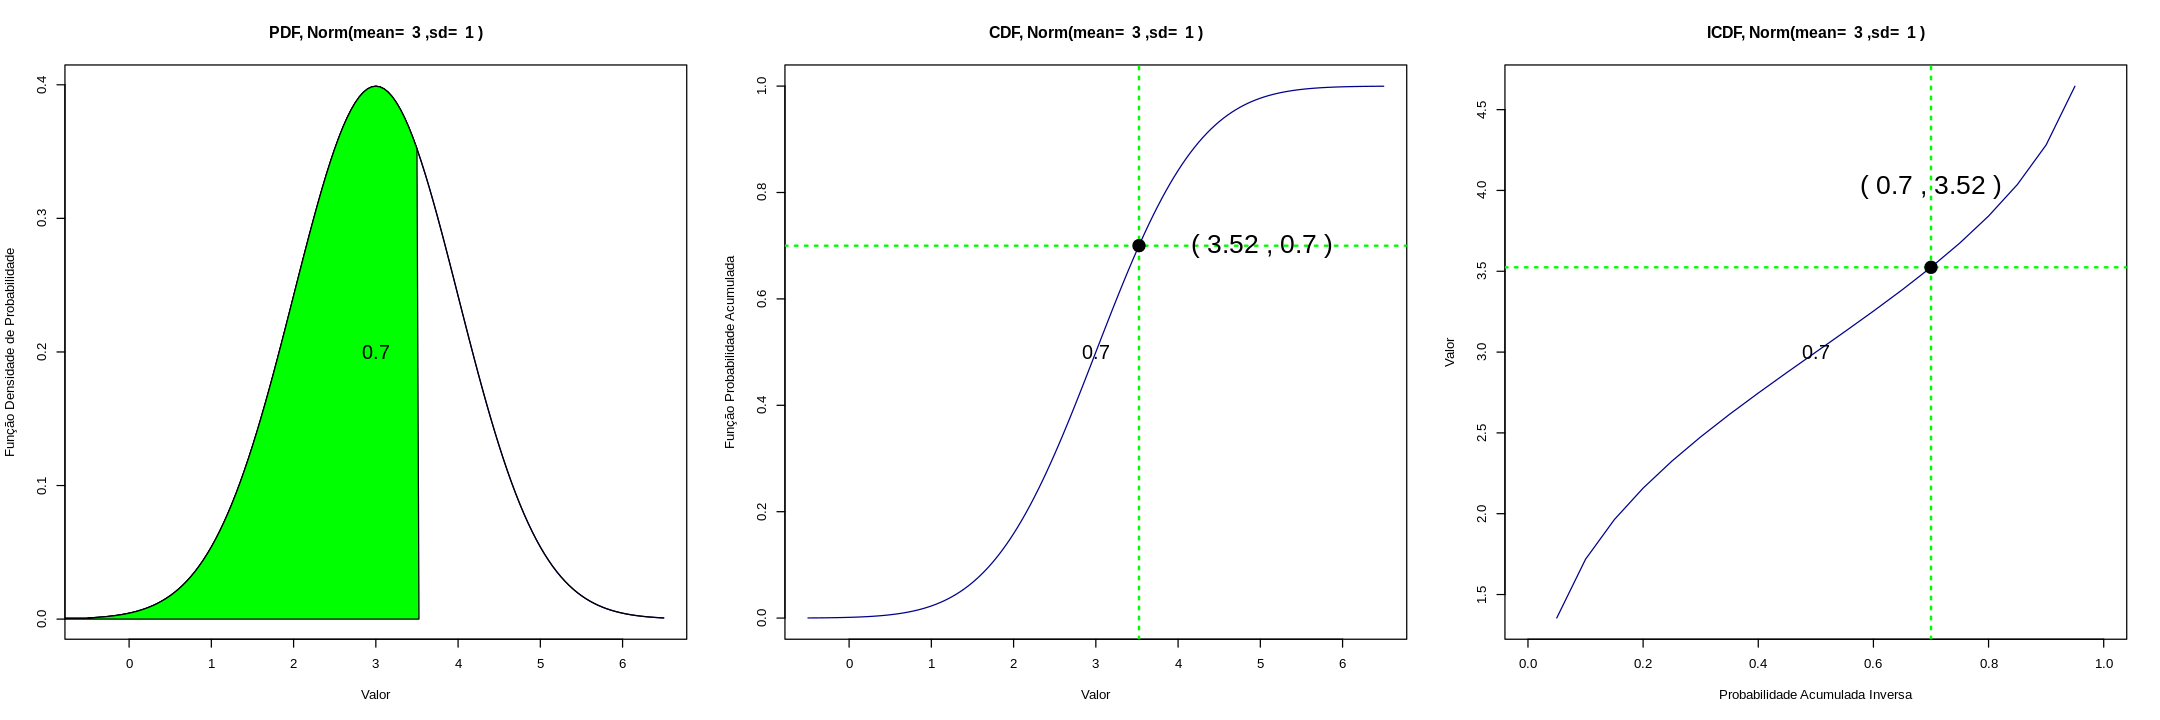

In [51]:
option = readline(prompt='Distribuição Normal - Entre com "s" se deseja empregar os valores padrão: ')

if (option == 's'){
  mu = 3
  sigma = 1
  p = 0.70
  lb = -100
  ub = qnorm(p,mean=3,sd=1)
} else {
  mu = as.numeric(readline(prompt='Entre com a média: ')) 
  sigma = as.numeric(readline(prompt='Entre com o desvio padrão: ')) 
  p = as.numeric(readline(prompt='Entre com o percentil desejado: '))
  lb = -100
  ub = qnorm(p,mean=3,sd=1)
}

prob = c(0)

x = seq(mu - 3.5*sigma,mu + 3.5*sigma,0.05)

par(mfrow = c(1, 3))
options(repr.plot.width=18, repr.plot.height=6)

prob = dnorm(x, mean=mu, sd=sigma)

txt = paste('PDF, Norm(mean= ', mu ,',sd= ',sigma,')' )  

plot(x,
     prob,
     type='l',
     xlab = 'Valor',
     ylab = 'Função Densidade de Probabilidade',
     col='darkblue')
title(txt)

i <- x >= lb & x <= ub
lines(x, prob)                                       # desenha as linhas limite
polygon(c(lb,x[i],ub), c(0,prob[i],0), col="green")  # preenche a área sob a curva

p_intervalo = pnorm(ub,mean=mu,sd=sigma) - pnorm(lb,mean=mu,sd=sigma)
text(( par('xaxp')[1]+par('xaxp')[2] )/2,( par('yaxp')[1]+par('yaxp')[2] )/2, round(p_intervalo,4),cex=1.5)

prob = pnorm(x, mean=mu, sd=sigma)

txt = paste('CDF, Norm(mean= ', mu ,',sd= ',sigma,')' )  

plot(x,
     prob,
     type='l',
     xlab = 'Valor',
     ylab = 'Função Probabilidade Acumulada',
     col='darkblue')
title(txt)

abline(v=ub,col='green',lty='dotted',lwd=2)
abline(h=pnorm(ub,mean=mu,sd=sigma),col='green',lty='dotted',lwd=2)
points(ub,pnorm(ub,mean=mu,sd=sigma),col='black',lwd=6)

text(( par('xaxp')[1]+par('xaxp')[2] )/2,( par('yaxp')[1]+par('yaxp')[2] )/2, round(pnorm(ub,mean=mu,sd=sigma),4),cex=1.5)

txt = paste('(',round(ub,2),',',round(pnorm(ub,mean=mu,sd=sigma),2),')')
text(ub+1.5*sigma,pnorm(ub,mean=mu,sd=sigma),txt,cex=2)

prob = seq(0,1,0.05)
valor = qnorm(prob, mean=mu, sd=sigma)
txt = paste('ICDF, Norm(mean= ', mu ,',sd= ',sigma,')' )  

plot(prob,
     valor,
     type='l',
     ylab = 'Valor',
     xlab = 'Probabilidade Acumulada Inversa',
     col='darkblue')
title(txt)

abline(h=ub,col='green',lty='dotted',lwd=2)
abline(v=pnorm(ub,mean=mu,sd=sigma),col='green',lty='dotted',lwd=2)
points(pnorm(ub,mean=mu,sd=sigma),ub,col='black',lwd=6)

txt = paste('(',round(pnorm(ub,mean=mu,sd=sigma),2),',',round(ub,2),')')
text(pnorm(ub,mean=mu,sd=sigma),ub+0.5*sigma,txt,cex=2)

text(( par('xaxp')[1]+par('xaxp')[2] )/2,( par('yaxp')[1]+par('yaxp')[2] )/2, round(pnorm(ub,mean=mu,sd=sigma),4),cex=1.5)



## Valores aleatórios `rnorm, r<dist>`

In [53]:
# rnorm(n, mean = 0, sd = 1)
print( rnorm(100,mean=3,sd=1) )


  [1] 3.7180386 3.4130946 2.6084812 2.8070301 3.7945585 2.8664123 2.9237185
  [8] 2.5723883 2.4113531 2.9192364 4.4356697 1.4130254 1.0589500 3.4961413
 [15] 3.6606750 3.1314654 2.0222667 3.0473276 4.7699535 2.0756646 3.4627106
 [22] 3.6234737 2.9849601 3.5948194 2.7130449 4.9443414 1.4031578 5.5241187
 [29] 1.9634221 3.7899761 3.9975879 3.0357635 3.0364109 2.9136563 2.2651881
 [36] 2.3960625 2.5188573 4.0459804 2.3141971 3.5206944 2.6490096 4.7980178
 [43] 2.4691604 4.1068832 2.2427726 2.8939050 4.2627247 2.5334216 5.0853741
 [50] 1.9873435 4.6299055 2.0726115 2.8035651 2.6950068 4.2684176 3.4626030
 [57] 3.6751253 4.4994049 3.9240798 2.0183727 4.0462797 2.6448853 3.0448349
 [64] 3.9583797 2.5146271 2.2124549 4.4385032 3.7476781 4.6346032 1.5710368
 [71] 1.9971563 3.9317225 0.4707914 3.0474619 2.5906864 2.5832117 4.6436732
 [78] 4.8194249 2.0579810 1.3847498 4.1600257 0.6835426 2.8994612 1.9349909
 [85] 4.0077996 4.2684572 4.2385711 2.4135016 2.9471667 2.6315311 3.5569387
 [92] 1.8950

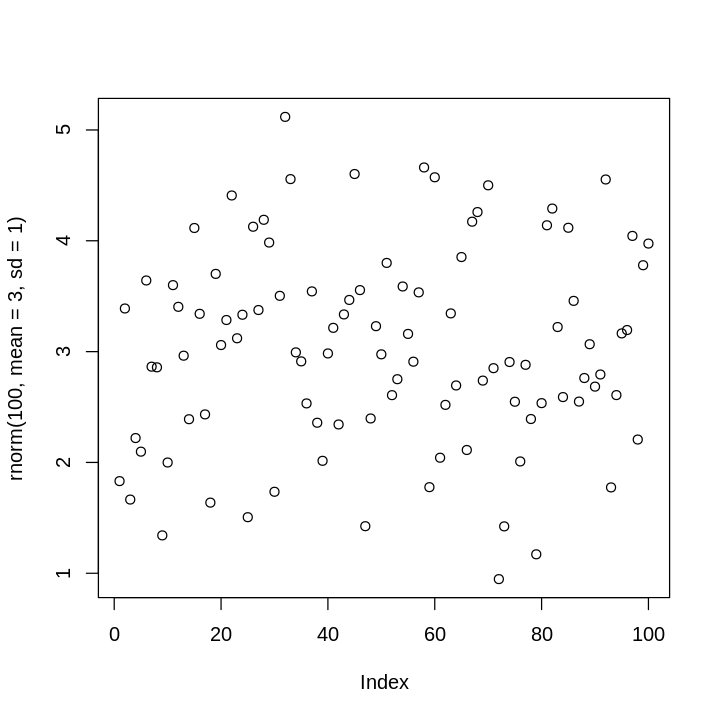

In [69]:
par(mfrow = c(1, 1))
options(repr.plot.width=6, repr.plot.height=6)

plot(rnorm(100,mean=3,sd=1))

Distribuição Normal - Entre com "s" se deseja empregar os valores padrão: s


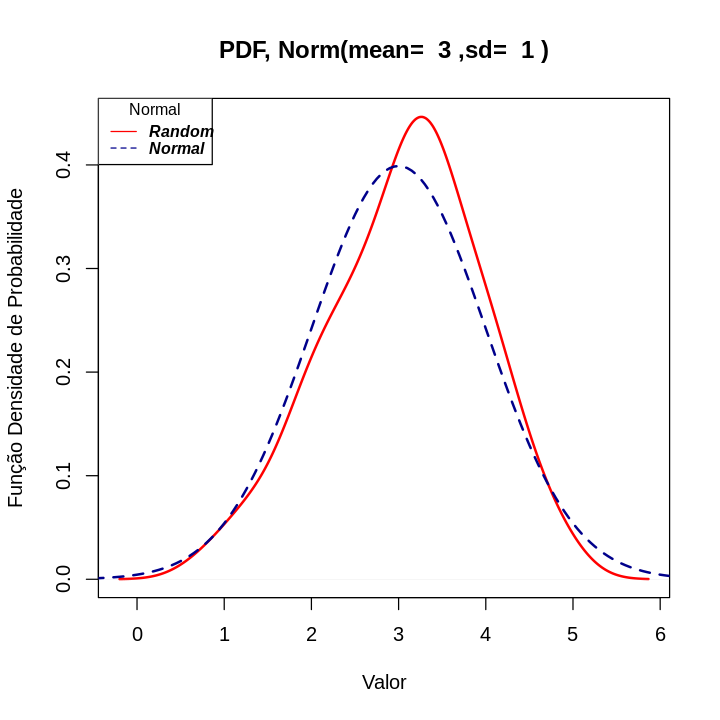

In [68]:
option = readline(prompt='Distribuição Normal - Entre com "s" se deseja empregar os valores padrão: ')

if (option == 's'){
  mu = 3
  sigma = 1
} else {
  mu = as.numeric(readline(prompt='Entre com a média: ')) 
  sigma = as.numeric(readline(prompt='Entre com o desvio padrão: ')) 
}

prob = c(0)

x = seq(mu - 3.5*sigma,mu + 3.5*sigma,0.05)

par(mfrow = c(1, 1))
options(repr.plot.width=6, repr.plot.height=6)

prob = dnorm(x, mean=mu, sd=sigma)

txt = paste('PDF, Norm(mean= ', mu ,',sd= ',sigma,')' )  

plot( density( rnorm(100,mean=mu,sd=sigma) ),
     type='l',
     xlab = 'Valor',
     ylab = 'Função Densidade de Probabilidade',
     main='',
     col='red',
     lwd=2)
title(txt)

lines(x,
     prob,
     type='l',
     col='darkblue',
     lty=2,
     lwd=2)

legend('topleft', legend=c("Random", "Normal"),
       col=c("red", "darkblue"), lty=1:2, cex=0.8,
       title="Normal", text.font=4)




## Distribuição t-Student 

```
dt(x, df, ncp, log = FALSE)
pt(q, df, ncp, lower.tail = TRUE, log.p = FALSE)
qt(p, df, ncp, lower.tail = TRUE, log.p = FALSE)
rt(n, df, ncp)
```

In [78]:
rt( 10, df=10 )

[1] -1.1824774  0.9967029 -1.5603067 -0.7628713 -0.3395866  0.6834893
 [7] -2.0989416 -0.7915952 -0.9286449  0.1137973

In [74]:
pt( 1, df=10 ) - pt( 0.75, df=10 )

[1] 0.06481943

In [75]:
qt( 0.75, df=10 ) 

[1] 0.6998121